In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [75]:
start = '2012-01-01'
end = '2024-01-01'

stock = 'GOOG'
crypto = 'BTC-USD'

data = yf.download(stock, start, end)


[*********************100%%**********************]  1 of 1 completed


In [76]:
data.reset_index(inplace=True)

In [77]:
ma_100_days = data.Close.rolling(100).mean()

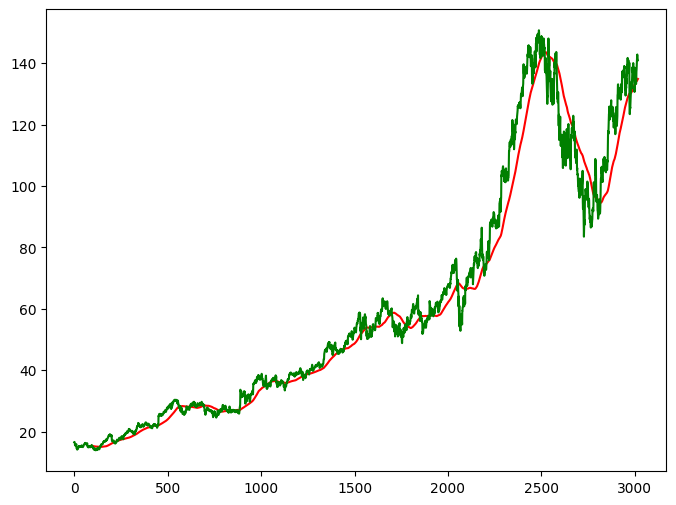

In [78]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [79]:
ma_200_days = data.Close.rolling(200).mean()

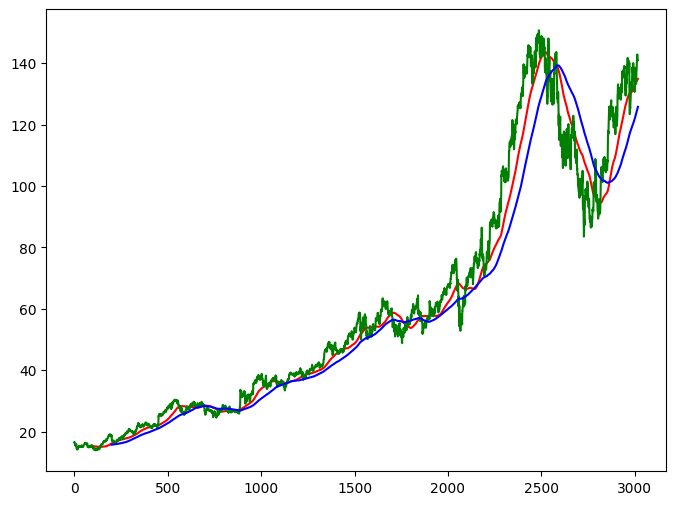

In [80]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.plot(ma_200_days, 'b')
plt.show()

In [81]:
data.dropna(inplace=True) #Remove any null values in the dataset 

In [82]:
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)])

In [83]:
data_train.shape[0]

2414

In [84]:
data_test.shape[0]

604

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [86]:
data_train_scale = scaler.fit_transform(data_train)

In [87]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i - 100:i])
    y.append(data_train_scale[i, 0])
    

In [88]:
x, y = np.array(x), np.array(y)

In [89]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [90]:
model = Sequential()
model.add(LSTM(units = 50, activation ='relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\vrajs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [91]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [92]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 33s 243ms/step - loss: 0.0364
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 248ms/step - loss: 0.0043
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 241ms/step - loss: 0.0033
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 243ms/step - loss: 0.0028
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 240ms/step - loss: 0.0030
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - loss: 0.0035
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 243ms/step - loss: 0.0029
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 246ms/step - loss: 0.0027
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 239ms/step - loss: 0.0025
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 240ms/step - loss: 0.0026
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 246ms/step - loss: 0.0020
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 240ms/step - loss: 0.0024
Epoch 13/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - loss: 0.0020
Epoch 14/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - loss: 0.0021
Epoch 15/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [93]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [95]:
past_100_days = data_train.tail(100)

In [96]:
data_test = pd.concat([past_100_days, data_test], ignore_index = True)

In [98]:
data_test_scale = scaler.fit_transform(data_test)

In [100]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i - 100:i])
    y.append(data_test_scale[i, 0])
x, y = np.array(x), np.array(y)

In [101]:
y_predict = model.predict(x)

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step


In [105]:
scale = 1/scaler.scale_

In [106]:
y_predict = y_predict * scale

In [107]:
y = y * scale

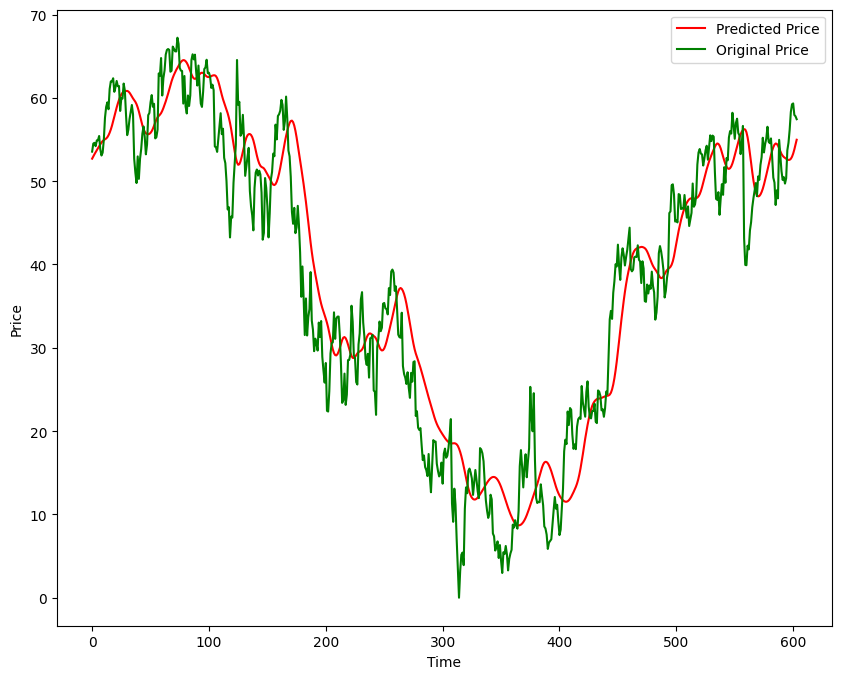

In [108]:
plt.figure(figsize=(10, 8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price') 
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [110]:
model.save('Stock Predictions Model.keras')